# **Data Science & Business Analytics**
#### ***The sparks foundation***


### **TASK - 3 Exploratory Data Analysis - Retail** 
#### ***By - Kamad Saxena***

The following are the project objectives-

* Performing EDA on the data to derive insights on how the profits can be increased.
* Discovering the weak areas of the sales deparment in order to improve the sales.
* Discovering hidden trends within the data that will allow the sales deparment to cater to region-specific needs of the buyers.

### Importing packages
To import necessary libraries for this task, execute the following import statements:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotnine import *


#### Collecting the data 

In [ ]:
retail = pd.read_csv('/content/drive/MyDrive/grip/SampleSuperstore.csv')
retail.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Checking for null entries

In [ ]:
retail.isnull().sum(axis = 0).to_frame()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


### Information about dataset

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Checking for unique Entries

In [ ]:
retail.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Describing the dataset

In [ ]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Counting the entries based on States 

In [ ]:
# Count the total repeatable states
retail['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

### Plotting the entries 

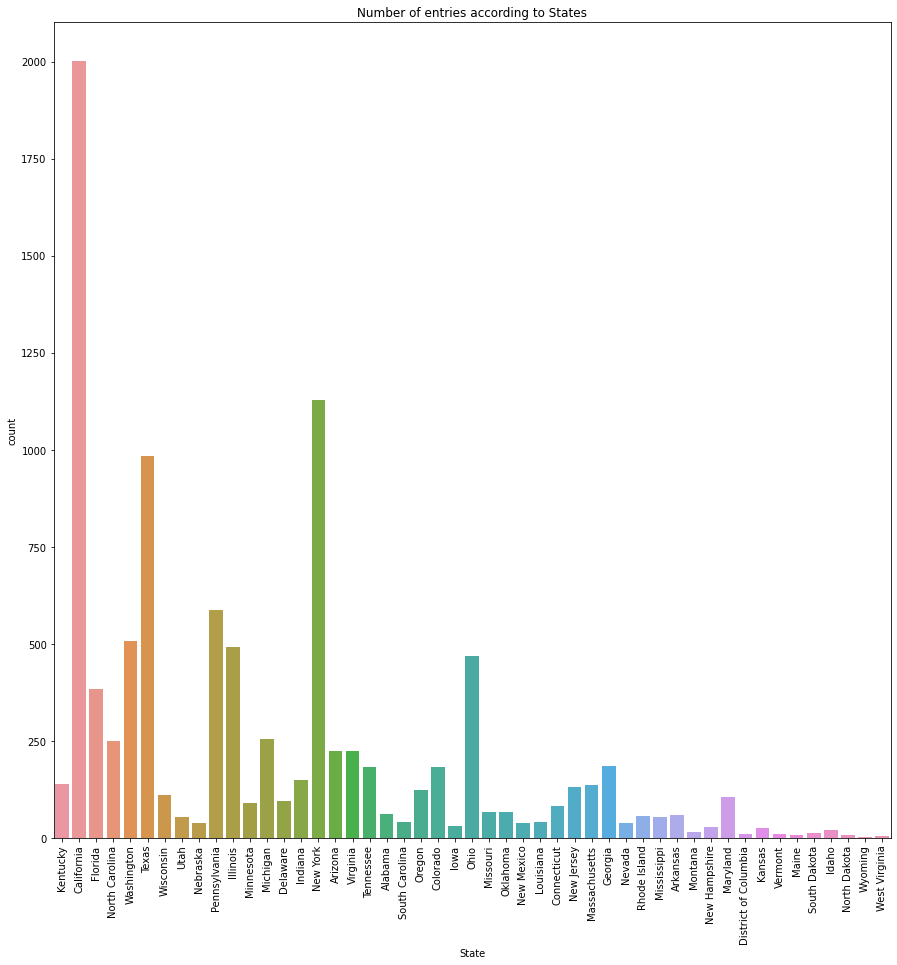

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=retail['State'])
plt.xticks(rotation=90)
plt.title("Number of entries according to States")
plt.show()

### Alloting codes to the states

In [ ]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
              'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI',
              'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY',
              'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
              'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
              'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
              'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
              'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
              'Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
retail['state_code'] = retail.State.apply(lambda x: state_code[x])

### Plotting Total State-Wise Sales

In [ ]:
state_data = retail[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'RdBu',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

### Plotting Profit according to Sub-Category

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.6/dist-packages/mizani/palettes.py:439: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colorsReturning the palette you asked for withthat many colors

/usr/local/lib/python3.6/dist-packages/mizani/palettes.py:439: UserWarning:

Warning message:Brewer palette Spectral has a maximum of 11 colorsReturning the palette you asked for withthat many colors



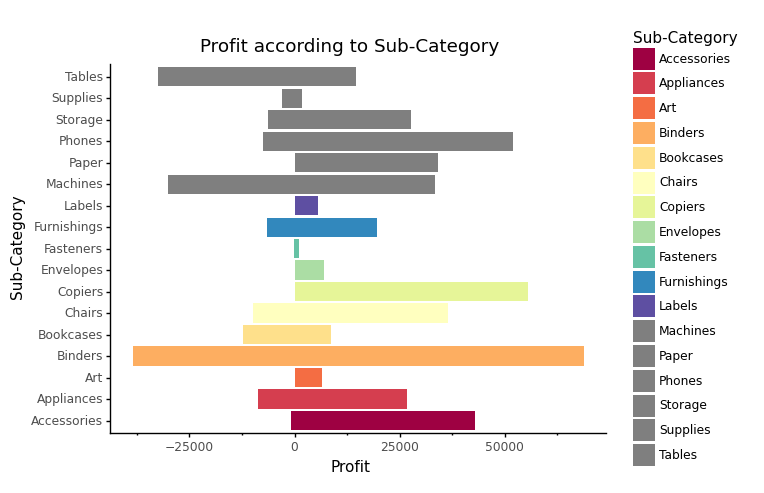

<ggplot: (-9223363281025005603)>

In [ ]:
Profit_plot = (ggplot(retail, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle("Profit according to Sub-Category"))

display(Profit_plot)

### Plotting for State-wise Profit and loss

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Profit, 
    locationmode = 'USA-states', 
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
#     reversescale = True,
    colorbar_title = 'Profits in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()

### Plotting Sales From Every Segment Of United States of Whole Data

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



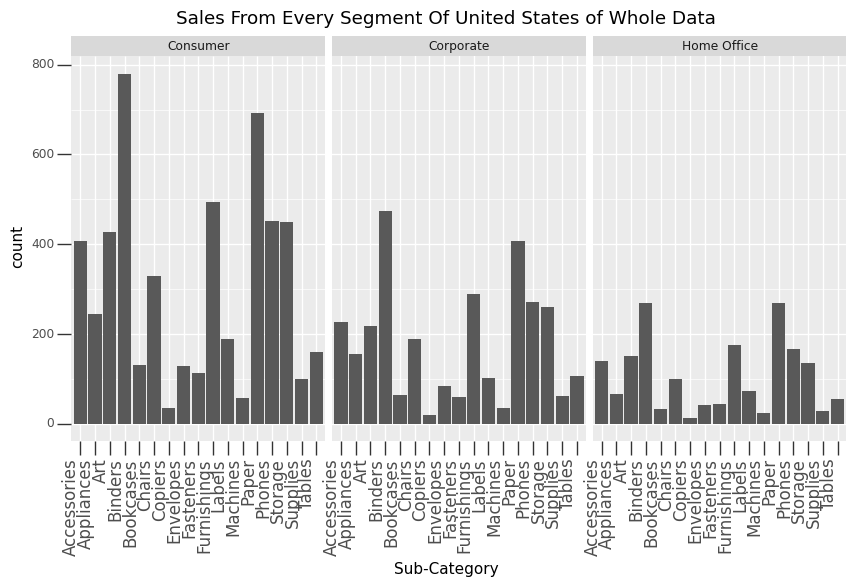

<ggplot: (-9223363281022506573)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(retail, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

### Plotting for Discount on Categories From Every Segment Of United States of Whole Data

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



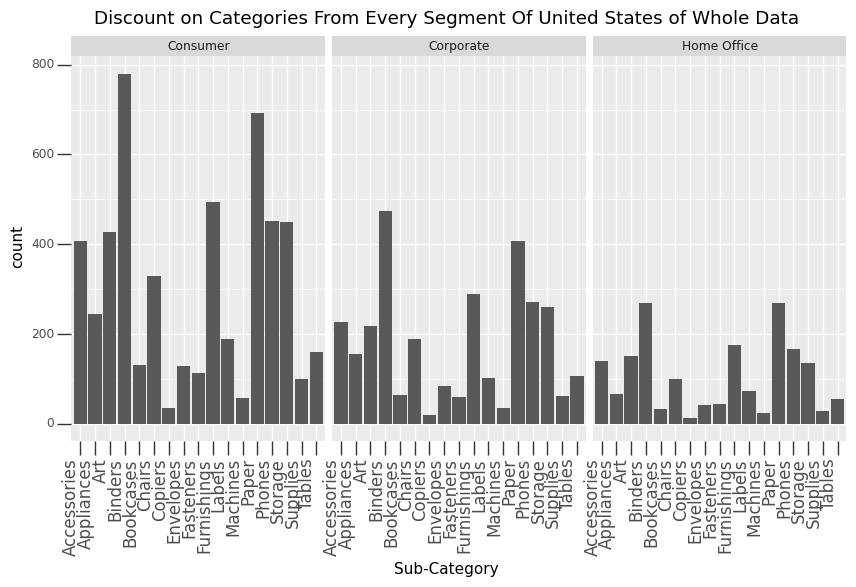

<ggplot: (8755842245622)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(retail, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))